# OMG Narwhals L3 data processing
## Create NetCDFs for each mooring

#### This notebook merges L2 temperature logger and CTD data to make daily-averaged L3 datasets for each mooring

In [1]:
## allows proper loading of external py scripts and functions
%load_ext autoreload
%autoreload 1

In [2]:
## import all necessary libraries
import string
import numpy as np
import pandas as pd
import csv
import glob, os
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint
import xarray as xr
import netCDF4 as nc4
from statistics import mode
import seaborn as sns

## external, custom py script within same directory
import omgL3_funs

## Create merged L3 datasets for each mooring

In [3]:
years = [2019, 2020]
moorings_2019 = ["Rink glacier", "Kong Oscar glacier", "Sverdrup glacier"]
moorings_2020 = ["Fisher Islands", "Kong Oscar glacier"]

processing 2018-2019 Rink glacier mooring data
merging Rink datasets


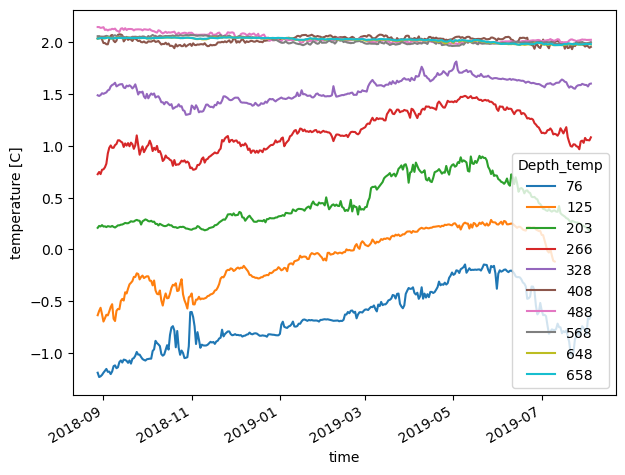

<xarray.Dataset>
Dimensions:                (time: 342, Depth_CTD: 2, Depth_temp: 10)
Coordinates:
  * time                   (time) datetime64[ns] 2018-08-28 ... 2019-08-04
  * Depth_CTD              (Depth_CTD) int32 76 328
    SN_CTD                 (Depth_CTD) object 'SBE37_03716788' 'SBE37_03716789'
  * Depth_temp             (Depth_temp) int32 76 125 203 266 ... 488 568 648 658
    SN_temp                (Depth_temp) object 'SBE37_03716788' ... 'SBE56_05...
Data variables:
    conductivity           (Depth_CTD, time) float64 2.682 2.678 ... 2.998 2.998
    density                (Depth_CTD, time) float64 1.027e+03 ... 1.029e+03
    potential_temperature  (Depth_CTD, time) float64 -1.191 -1.233 ... 1.582
    pressure               (Depth_CTD, time) float64 76.85 77.02 ... 331.6 331.6
    salinity               (Depth_CTD, time) float64 33.3 33.3 ... 34.24 34.24
    temperature            (Depth_temp, time) float64 -1.189 -1.231 ... 1.98
Attributes: (12/37)
    title:                  OMG Narwhals Rink 2018-2019 mooring Level 3 data
    summary:                This file contains daily-averaged conductivity, t...
    keywords:               Water Temperature
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_Rink_1D_L3_2018-2019
    uuid:                   906a0f5c-14dd-11ec-82a8-0242ac130003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

processing 2018-2019 Kong Oscar glacier mooring data
merging Kong Oscar datasets


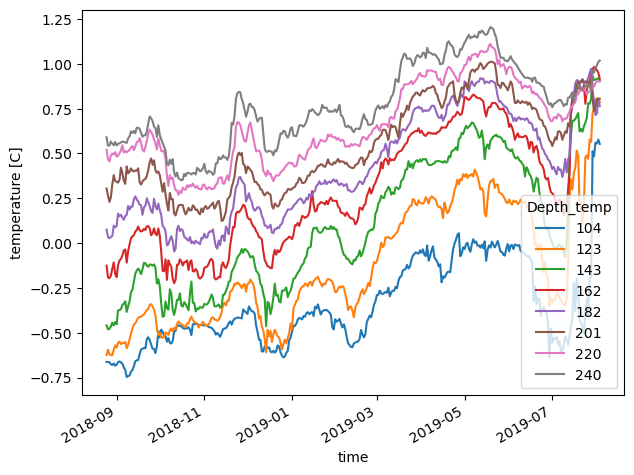

<xarray.Dataset>
Dimensions:                (time: 344, Depth_CTD: 2, Depth_temp: 8)
Coordinates:
  * time                   (time) datetime64[ns] 2018-08-25 ... 2019-08-03
  * Depth_CTD              (Depth_CTD) int32 104 240
    SN_CTD                 (Depth_CTD) object 'SBE37_03716754' 'SBE37_03716526'
  * Depth_temp             (Depth_temp) int32 104 123 143 162 182 201 220 240
    SN_temp                (Depth_temp) object 'SBE37_03716754' ... 'SBE37_03...
Data variables:
    conductivity           (Depth_CTD, time) float64 2.732 2.731 ... 2.93 2.931
    density                (Depth_CTD, time) float64 1.027e+03 ... 1.029e+03
    potential_temperature  (Depth_CTD, time) float64 -0.6656 -0.6667 ... 1.006
    pressure               (Depth_CTD, time) float64 98.55 98.6 ... 260.7 260.9
    salinity               (Depth_CTD, time) float64 33.38 33.38 ... 34.06 34.06
    temperature            (Depth_temp, time) float64 -0.6629 -0.664 ... 1.017
Attributes: (12/37)
    title:                  OMG Narwhals Kong Oscar 2018-2019 mooring Level 3...
    summary:                This file contains daily-averaged conductivity, t...
    keywords:               Water Temperature
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_KongOscar_1D_L3_2018-2019
    uuid:                   906a1010-14dd-11ec-82a8-0242ac130003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

processing 2018-2019 Sverdrup glacier mooring data
merging Sverdrup datasets


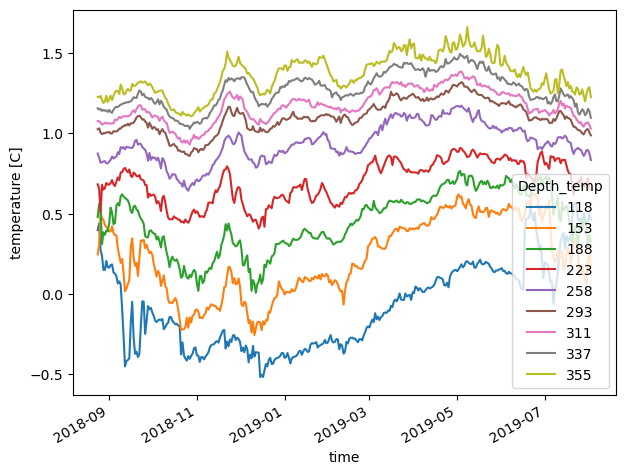

<xarray.Dataset>
Dimensions:                (time: 344, Depth_CTD: 2, Depth_temp: 9)
Coordinates:
  * time                   (time) datetime64[ns] 2018-08-24 ... 2019-08-02
  * Depth_CTD              (Depth_CTD) int32 118 355
    SN_CTD                 (Depth_CTD) object 'SBE37_03716787' 'SBE37_03716790'
  * Depth_temp             (Depth_temp) int32 118 153 188 223 ... 311 337 355
    SN_temp                (Depth_temp) object 'SBE37_03716787' ... 'SBE37_03...
Data variables:
    conductivity           (Depth_CTD, time) float64 2.835 2.839 ... 2.971 2.964
    density                (Depth_CTD, time) float64 1.028e+03 ... 1.029e+03
    potential_temperature  (Depth_CTD, time) float64 0.3933 0.4332 ... 1.208
    pressure               (Depth_CTD, time) float64 119.6 119.6 ... 359.3 359.6
    salinity               (Depth_CTD, time) float64 33.58 33.58 ... 34.22 34.2
    temperature            (Depth_temp, time) float64 0.3978 0.4378 ... 1.226
Attributes: (12/37)
    title:                  OMG Narwhals Sverdrup 2018-2019 mooring Level 3 data
    summary:                This file contains daily-averaged conductivity, t...
    keywords:               Water Temperature
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_Sverdrup_1D_L3_2018-2019
    uuid:                   906a11dc-14dd-11ec-82a8-0242ac130003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

processing 2019-2020 Fisher Islands mooring data
merging Fisher datasets


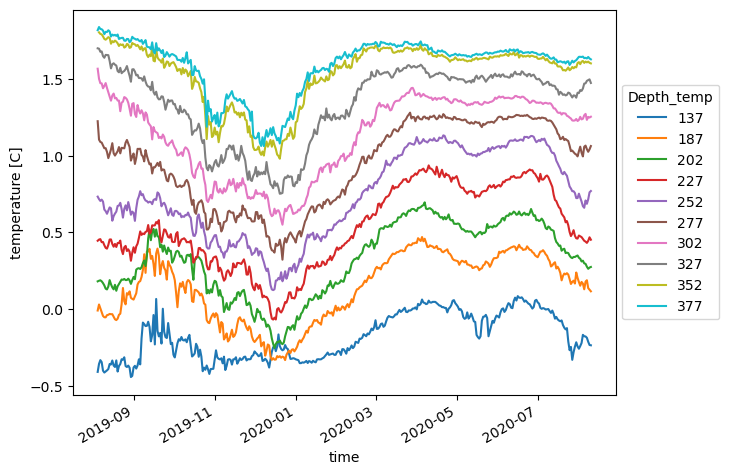

<xarray.Dataset>
Dimensions:                (time: 372, Depth_CTD: 2, Depth_temp: 10)
Coordinates:
  * time                   (time) datetime64[ns] 2019-08-05 ... 2020-08-10
  * Depth_CTD              (Depth_CTD) int32 137 377
    SN_CTD                 (Depth_CTD) object 'SBE37_03716754' 'SBE37_03716526'
  * Depth_temp             (Depth_temp) int32 137 187 202 227 ... 327 352 377
    SN_temp                (Depth_temp) object 'SBE37_03716754' ... 'SBE37_03...
Data variables:
    conductivity           (Depth_CTD, time) float64 2.769 2.774 ... 3.011 3.01
    density                (Depth_CTD, time) float64 1.028e+03 ... 1.029e+03
    potential_temperature  (Depth_CTD, time) float64 -0.415 -0.3632 ... 1.609
    pressure               (Depth_CTD, time) float64 139.1 139.0 ... 380.8 381.0
    salinity               (Depth_CTD, time) float64 33.58 33.58 ... 34.34 34.34
    temperature            (Depth_temp, time) float64 -0.4107 -0.3588 ... 1.629
Attributes: (12/37)
    title:                  OMG Narwhals Fisher Islands 2019-2020 mooring Lev...
    summary:                This file contains daily-averaged conductivity, t...
    keywords:               Water Temperature
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_Fisher_1D_L3_2019-2020
    uuid:                   37f9a45c-726d-11ec-90d6-0242ac120003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

processing 2019-2020 Kong Oscar glacier mooring data
merging Kong Oscar datasets


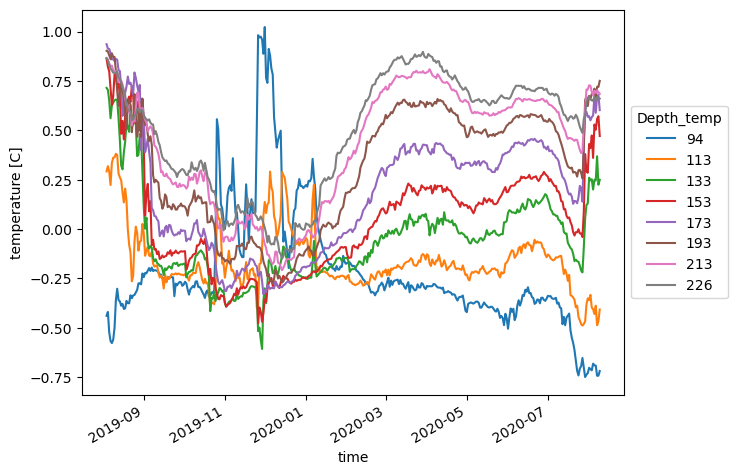

<xarray.Dataset>
Dimensions:                (time: 372, Depth_CTD: 2, Depth_temp: 8)
Coordinates:
  * time                   (time) datetime64[ns] 2019-08-04 ... 2020-08-09
  * Depth_CTD              (Depth_CTD) int32 94 226
    SN_CTD                 (Depth_CTD) object 'SBE37_03716787' 'SBE37_03716790'
  * Depth_temp             (Depth_temp) int32 94 113 133 153 173 193 213 226
    SN_temp                (Depth_temp) object 'SBE37_03716787' ... 'SBE37_03...
Data variables:
    conductivity           (Depth_CTD, time) float64 2.75 2.751 ... 2.892 2.891
    density                (Depth_CTD, time) float64 1.027e+03 ... 1.028e+03
    potential_temperature  (Depth_CTD, time) float64 -0.443 -0.4231 ... 0.6509
    pressure               (Depth_CTD, time) float64 94.49 94.56 ... 228.8 228.8
    salinity               (Depth_CTD, time) float64 33.38 33.38 ... 33.96 33.96
    temperature            (Depth_temp, time) float64 -0.4402 -0.4202 ... 0.6604
Attributes: (12/37)
    title:                  OMG Narwhals Kong Oscar 2019-2020 mooring Level 3...
    summary:                This file contains daily-averaged conductivity, t...
    keywords:               Water Temperature
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_KongOscar_1D_L3_2019-2020
    uuid:                   37f9a56a-726d-11ec-90d6-0242ac120003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

In [4]:
for year in years:
    ## directory for mooring CTD L2 datasets
    mooring_sbe37_dir = 'C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/' + str(year)
    
    ## directory for temperature logger L1 datasets
    mooring_sbe56_dir = "C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L1/" + str(year) + "/SBE56"
    
    ## get all metadata associated with each data file
    metadata_sbe37 = pd.read_csv("/Users/marie/Documents/PhD/Chapter_3/OMG_Python_dir/metadata/" + str(year) + "/SBE37_metadata_" + str(year) + ".csv") # SBE37
    metadata_sbe56 = pd.read_csv("/Users/marie/Documents/PhD/Chapter_3/OMG_Python_dir/metadata/" + str(year) + "/SBE56_metadata_" + str(year) + ".csv") # SBE56
    
    if year == 2019: 
        for mooring in moorings_2019:
            meta_sbe37 = metadata_sbe37.loc[metadata_sbe37.loc[:,"glacier_front"] == mooring,:]
            meta_sbe56 = metadata_sbe56.loc[metadata_sbe56.loc[:,"glacier_front"] == mooring,:]
            
            ## daily averaging for sbe37 datasets
            filenames_sbe37 = meta_sbe37['filename_L2']
            sbe37_1_ds_1d = omgL3_funs.sbe37_avg(filenames_sbe37.iloc[0], mooring_sbe37_dir, avg_length = '1D')
            sbe37_2_ds_1d = omgL3_funs.sbe37_avg(filenames_sbe37.iloc[1], mooring_sbe37_dir, avg_length = '1D')
            
            if mooring == 'Rink glacier': 
                print("processing 2018-2019 Rink glacier mooring data")
                truncate = slice("2018-08-26","2019-08-04") # truncate data so that the length of all datasets is equal
                sbe37_1_ds = sbe37_1_ds_1d.sel(time=truncate)
                sbe37_2_ds = sbe37_2_ds_1d.sel(time=truncate)
                
                ## daily averaging for sbe56 datasets
                filenames_sbe56 = meta_sbe56['filename_L1']
                netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_03716788_20180826.nc' # used to remove flag_depth observations
                sbe56_1_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_2_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_3_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_4_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_5_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_6_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_7_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[6], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_8_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[7], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                
                ## define attributes for this mooring
                file_id = 'OMG_Narwhals_Mooring_Rink_1D_L3_2018-2019'
                uuid = '906a0f5c-14dd-11ec-82a8-0242ac130003'
                filename = 'OMG_Narwhals_Mooring_Rink_1D_L3.nc'
                title = 'OMG Narwhals Rink 2018-2019 mooring Level 3 data'
                
            if mooring == 'Kong Oscar glacier': 
                print("processing 2018-2019 Kong Oscar glacier mooring data")
                truncate = slice("2018-08-25","2019-08-03") # truncate data so that the length of all datasets is equal
                sbe37_1_ds = sbe37_1_ds_1d.sel(time=truncate)
                sbe37_2_ds = sbe37_2_ds_1d.sel(time=truncate)
                
                ## daily averaging for sbe56 datasets
                filenames_sbe56 = meta_sbe56['filename_L1']
                netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_03716754_20180825.nc'
                sbe56_1_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_2_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_3_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_4_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_5_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_6_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                
                ## define attributes for this mooring
                file_id = 'OMG_Narwhals_Mooring_KongOscar_1D_L3_2018-2019'
                uuid = '906a1010-14dd-11ec-82a8-0242ac130003'
                filename = 'OMG_Narwhals_Mooring_KongOscar2019_1D_L3.nc'
                title = 'OMG Narwhals Kong Oscar 2018-2019 mooring Level 3 data'
                
            if mooring == 'Sverdrup glacier': 
                print("processing 2018-2019 Sverdrup glacier mooring data")
                truncate = slice("2018-08-24","2019-08-02") # truncate data so that the length of all datasets is equal
                sbe37_1_ds = sbe37_1_ds_1d.sel(time=truncate)
                sbe37_2_ds = sbe37_2_ds_1d.sel(time=truncate)
                
                ## daily averaging for sbe56 datasets
                filenames_sbe56 = meta_sbe56['filename_L1']
                netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_03716787_20180824.nc'
                sbe56_1_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_2_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_3_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_4_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_5_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_6_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_7_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[6], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                
                ## define attributes for this mooring
                file_id = 'OMG_Narwhals_Mooring_Sverdrup_1D_L3_2018-2019'
                uuid = '906a11dc-14dd-11ec-82a8-0242ac130003'
                filename = 'OMG_Narwhals_Mooring_Sverdrup_1D_L3.nc'
                title = 'OMG Narwhals Sverdrup 2018-2019 mooring Level 3 data'
                
            ## add depth to sbe37 variables
            sbe37_1_T, sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S = omgL3_funs.sbe37_add_dims(sbe37_1_ds)
            sbe37_2_T, sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S = omgL3_funs.sbe37_add_dims(sbe37_2_ds)
            
            ## add depth to sbe56 variables and then merge datasets
            if mooring == "Rink glacier":
                # add depth
                sbe56_1_T = omgL3_funs.sbe56_add_dims(sbe56_1_ds)
                sbe56_2_T = omgL3_funs.sbe56_add_dims(sbe56_2_ds)
                sbe56_3_T = omgL3_funs.sbe56_add_dims(sbe56_3_ds)
                sbe56_4_T = omgL3_funs.sbe56_add_dims(sbe56_4_ds)
                sbe56_5_T = omgL3_funs.sbe56_add_dims(sbe56_5_ds)
                sbe56_6_T = omgL3_funs.sbe56_add_dims(sbe56_6_ds)
                sbe56_7_T = omgL3_funs.sbe56_add_dims(sbe56_7_ds)
                sbe56_8_T = omgL3_funs.sbe56_add_dims(sbe56_8_ds)
                
                ## merge datasets
                print('merging Rink datasets')
                sbe_merged = xr.merge([sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S, sbe37_1_T,\
                                       sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S, sbe37_2_T,\
                                       sbe56_1_T, sbe56_2_T, sbe56_3_T, sbe56_4_T, sbe56_5_T, sbe56_6_T, sbe56_7_T, sbe56_8_T]) 
                
            if mooring == 'Kong Oscar glacier':
                # add depth
                sbe56_1_T = omgL3_funs.sbe56_add_dims(sbe56_1_ds)
                sbe56_2_T = omgL3_funs.sbe56_add_dims(sbe56_2_ds)
                sbe56_3_T = omgL3_funs.sbe56_add_dims(sbe56_3_ds)
                sbe56_4_T = omgL3_funs.sbe56_add_dims(sbe56_4_ds)
                sbe56_5_T = omgL3_funs.sbe56_add_dims(sbe56_5_ds)
                sbe56_6_T = omgL3_funs.sbe56_add_dims(sbe56_6_ds)
                
                ## merge datasets
                print('merging Kong Oscar datasets')
                sbe_merged = xr.merge([sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S, sbe37_1_T, \
                                       sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S, sbe37_2_T, \
                                       sbe56_1_T, sbe56_2_T, sbe56_3_T, sbe56_4_T, sbe56_5_T, sbe56_6_T]) 
                
            if mooring == 'Sverdrup glacier':
                # add depth
                sbe56_1_T = omgL3_funs.sbe56_add_dims(sbe56_1_ds)
                sbe56_2_T = omgL3_funs.sbe56_add_dims(sbe56_2_ds)
                sbe56_3_T = omgL3_funs.sbe56_add_dims(sbe56_3_ds)
                sbe56_4_T = omgL3_funs.sbe56_add_dims(sbe56_4_ds)
                sbe56_5_T = omgL3_funs.sbe56_add_dims(sbe56_5_ds)
                sbe56_6_T = omgL3_funs.sbe56_add_dims(sbe56_6_ds)
                sbe56_7_T = omgL3_funs.sbe56_add_dims(sbe56_7_ds)
                
                ## merge datasets
                print('merging Sverdrup datasets')
                sbe_merged = xr.merge([sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S, sbe37_1_T, \
                                       sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S, sbe37_2_T,
                                       sbe56_1_T, sbe56_2_T, sbe56_3_T, sbe56_4_T, sbe56_5_T, sbe56_6_T, sbe56_7_T]) 
            
            ## clear copied attributes from merge
            sbe_merged.attrs = ''
            ## copy attributes from previous netCDF
            sbe_merged.attrs = sbe56_1_ds.attrs
            
            # define new filename
            netcdf_filename = file_id + '.nc'
            
            ## add attributes to dataset
            sbe_merged.attrs['title'] = title
            sbe_merged.attrs['id'] = file_id
            sbe_merged.attrs['uuid'] = uuid
            sbe_merged.attrs['summary'] = 'This file contains daily-averaged conductivity, temperature, and depth measurements from CTD and temperature logger instruments attached to the same mooring. This dataset was collected by the Oceans Melting Greenland (OMG) Narwhals program that will provide subannual hydrographic variability measurements in three northwest Greenland fjords. Between July 2018 to July 2020, three bottom-mounted moorings with a suite of instrumentation were deployed year-round in three glacial fjord sites in Melville Bay, West Greenland: Sverdrup Glacier, Kong Oscar Glacier, and Fisher Islands/Rink Glacier. Examination of water properties at these sites will demonstrate the presence and potential seasonality of warm, salty Atlantic Water intrusion into these marine-terminating glaciers. Additonally, during summer cruises where moorings were deployed and/or recovered, a CTD was lowered into the water to obtain full water column profiles at various locations near the glacier fronts and offshore.'
            sbe_merged.attrs['source'] = 'Temperature and salinity data were collected using Conductivity Temperature Depth (CTD) and temperature logger instruments purchased from Sea-Bird Electronics, Inc. that were attached to the same mooring.'
            sbe_merged.attrs['filename'] = netcdf_filename
            sbe_merged.attrs['processing_level'] = 'L3'
            
            ## remove unneeded attrs
            sbe_merged.attrs.pop('serial_number')
            sbe_merged.attrs.pop('device_type')
            sbe_merged.attrs.pop('target_sensor_depth')
            sbe_merged.attrs.pop('actual_sensor_depth')
            sbe_merged.attrs.pop('sample_interval')
            sbe_merged.attrs.pop('probe_num')
            
            ## look at temp plot
            sbe_merged.temperature.plot.line(x="time", figsize = (7,5));
            sns.move_legend(plt.gca(), loc='center left', bbox_to_anchor=(1, 0.5))
            plt.show()
            
            ## double check new xarray dataset is organized properly
            with xr.set_options(display_style="html"):
                display(sbe_merged)
                
            ## save final, merged netcdf
            # Create NetCDF variable encoding (required to save the time values properly)
            new_encoding = omgL3_funs.create_encoding(sbe_merged)
            output_dir = Path('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
            sbe_merged.to_netcdf(output_dir / netcdf_filename, encoding=new_encoding)
            
    if year == 2020:
        for mooring in moorings_2020:
            meta_sbe37 = metadata_sbe37.loc[metadata_sbe37.loc[:,"glacier_front"] == mooring,:]
            meta_sbe56 = metadata_sbe56.loc[metadata_sbe56.loc[:,"glacier_front"] == mooring,:]
            
            ## daily averaging for sbe37 datasets
            filenames_sbe37 = meta_sbe37['filename_L2']
            sbe37_1_ds_1d = omgL3_funs.sbe37_avg(filenames_sbe37.iloc[0], mooring_sbe37_dir, avg_length = '1D')
            sbe37_2_ds_1d = omgL3_funs.sbe37_avg(filenames_sbe37.iloc[1], mooring_sbe37_dir, avg_length = '1D')
            
            if mooring == "Kong Oscar glacier": 
                print("processing 2019-2020 Kong Oscar glacier mooring data")
                truncate = slice("2019-08-04","2020-08-09") # truncate data so that the length of all datasets is equal
                sbe37_1_ds = sbe37_1_ds_1d.sel(time=truncate)
                sbe37_2_ds = sbe37_2_ds_1d.sel(time=truncate)

                ## daily averaging for sbe56 datasets
                filenames_sbe56 = meta_sbe56['filename_L1']
                netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_03716787_20190804.nc'
                sbe56_1_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_2_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_3_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_4_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_5_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_6_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                
                ## define attributes for this mooring
                file_id = 'OMG_Narwhals_Mooring_KongOscar_1D_L3_2019-2020'
                uuid = '37f9a56a-726d-11ec-90d6-0242ac120003'
                filename = 'OMG_Narwhals_Mooring_KongOscar2020_1D_L3.nc'
                title = 'OMG Narwhals Kong Oscar 2019-2020 mooring Level 3 data'
                
            if mooring == "Fisher Islands": 
                print("processing 2019-2020 Fisher Islands mooring data")
                truncate = slice("2019-08-05","2020-08-10") # truncate data so that the length of all datasets is equal
                sbe37_1_ds = sbe37_1_ds_1d.sel(time=truncate)
                sbe37_2_ds = sbe37_2_ds_1d.sel(time=truncate)
                
                ## daily averaging for sbe56 datasets
                filenames_sbe56 = meta_sbe56['filename_L1']
                netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_03716754_20190805.nc'
                sbe56_1_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_2_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_3_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_4_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_5_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_6_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_7_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[6], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_8_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[7], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                
                ## define attributes for this mooring
                file_id = 'OMG_Narwhals_Mooring_Fisher_1D_L3_2019-2020'
                uuid = '37f9a45c-726d-11ec-90d6-0242ac120003'
                filename = 'OMG_Narwhals_Mooring_Fisher_1D_L3.nc'
                title = 'OMG Narwhals Fisher Islands 2019-2020 mooring Level 3 data'
        
            ## add depth to sbe37 variables
            sbe37_1_T, sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S = omgL3_funs.sbe37_add_dims(sbe37_1_ds)
            sbe37_2_T, sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S = omgL3_funs.sbe37_add_dims(sbe37_2_ds)
            
            ## add depth to sbe56 variables and then merge datasets
            if mooring == "Fisher Islands":
                # add depth
                sbe56_1_T = omgL3_funs.sbe56_add_dims(sbe56_1_ds)
                sbe56_2_T = omgL3_funs.sbe56_add_dims(sbe56_2_ds)
                sbe56_3_T = omgL3_funs.sbe56_add_dims(sbe56_3_ds)
                sbe56_4_T = omgL3_funs.sbe56_add_dims(sbe56_4_ds)
                sbe56_5_T = omgL3_funs.sbe56_add_dims(sbe56_5_ds)
                sbe56_6_T = omgL3_funs.sbe56_add_dims(sbe56_6_ds)
                sbe56_7_T = omgL3_funs.sbe56_add_dims(sbe56_7_ds)
                sbe56_8_T = omgL3_funs.sbe56_add_dims(sbe56_8_ds)
                
                ## merge datasets
                print('merging Fisher datasets')
                sbe_merged = xr.merge([sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S, sbe37_1_T,\
                                       sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S, sbe37_2_T,\
                                       sbe56_1_T, sbe56_2_T, sbe56_3_T, sbe56_4_T, sbe56_5_T, sbe56_6_T, sbe56_7_T, sbe56_8_T]) 
                
            if mooring == 'Kong Oscar glacier':
                # add depth
                sbe56_1_T = omgL3_funs.sbe56_add_dims(sbe56_1_ds)
                sbe56_2_T = omgL3_funs.sbe56_add_dims(sbe56_2_ds)
                sbe56_3_T = omgL3_funs.sbe56_add_dims(sbe56_3_ds)
                sbe56_4_T = omgL3_funs.sbe56_add_dims(sbe56_4_ds)
                sbe56_5_T = omgL3_funs.sbe56_add_dims(sbe56_5_ds)
                sbe56_6_T = omgL3_funs.sbe56_add_dims(sbe56_6_ds)
                
                ## merge datasets
                print('merging Kong Oscar datasets')
                sbe_merged = xr.merge([sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S, sbe37_1_T, \
                                       sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S, sbe37_2_T, \
                                       sbe56_1_T, sbe56_2_T, sbe56_3_T, sbe56_4_T, sbe56_5_T, sbe56_6_T]) 
            
            ## clear copied attributes from merge
            sbe_merged.attrs = ''
            ## copy attributes from previous netCDF
            sbe_merged.attrs = sbe56_1_ds.attrs
            
            # define new filename
            netcdf_filename = file_id + '.nc'
            
            ## add attributes to dataset
            sbe_merged.attrs['title'] = title
            sbe_merged.attrs['id'] = file_id
            sbe_merged.attrs['uuid'] = uuid
            sbe_merged.attrs['summary'] = 'This file contains daily-averaged conductivity, temperature, and depth measurements from CTD and temperature logger instruments attached to the same mooring. This dataset was collected by the Oceans Melting Greenland (OMG) Narwhals program that will provide subannual hydrographic variability measurements in three northwest Greenland fjords. Between July 2018 to July 2020, three bottom-mounted moorings with a suite of instrumentation were deployed year-round in three glacial fjord sites in Melville Bay, West Greenland: Sverdrup Glacier, Kong Oscar Glacier, and Fisher Islands/Rink Glacier. Examination of water properties at these sites will demonstrate the presence and potential seasonality of warm, salty Atlantic Water intrusion into these marine-terminating glaciers. Additonally, during summer cruises where moorings were deployed and/or recovered, a CTD was lowered into the water to obtain full water column profiles at various locations near the glacier fronts and offshore.'
            sbe_merged.attrs['source'] = 'Temperature and salinity data were collected using Conductivity Temperature Depth (CTD) and temperature logger instruments purchased from Sea-Bird Electronics, Inc. that were attached to the same mooring.'
            sbe_merged.attrs['filename'] = netcdf_filename
            sbe_merged.attrs['processing_level'] = 'L3'
            
            ## remove unneeded attrs
            sbe_merged.attrs.pop('serial_number')
            sbe_merged.attrs.pop('device_type')
            sbe_merged.attrs.pop('target_sensor_depth')
            sbe_merged.attrs.pop('actual_sensor_depth')
            sbe_merged.attrs.pop('sample_interval')
            sbe_merged.attrs.pop('probe_num')
            
            ## look at temp plot
            sbe_merged.temperature.plot.line(x="time", figsize = (7,5))
            sns.move_legend(plt.gca(), loc='center left', bbox_to_anchor=(1, 0.5))
            plt.show()
            
            ## double check new xarray dataset is organized properly
            with xr.set_options(display_style="html"):
                display(sbe_merged)
                
            ## save final, merged netcdf
            # Create NetCDF variable encoding (required to save the time values properly)
            new_encoding = omgL3_funs.create_encoding(sbe_merged)
            output_dir = Path('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2020') # 2020
            sbe_merged.to_netcdf(output_dir / netcdf_filename, encoding=new_encoding)

## Check a file

In [12]:
tmp = xr.open_dataset('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019/OMG_Narwhals_Mooring_Rink_1D_L3_2018-2019.nc')
tmp.close()

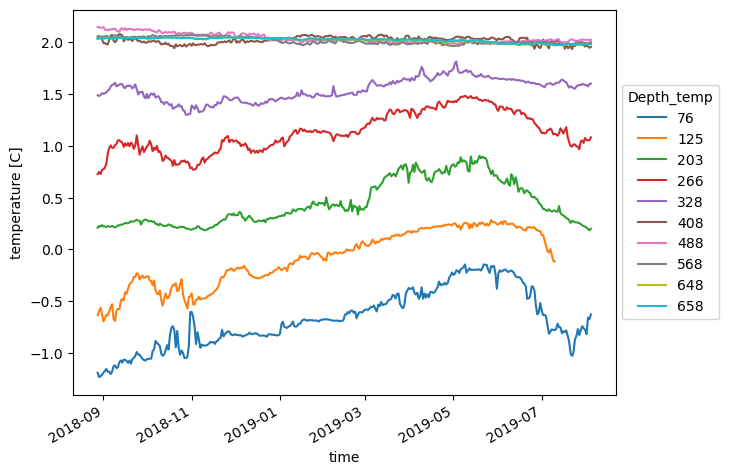

In [28]:
tmp.temperature.plot.line(x="time", figsize = (7,5));
sns.move_legend(plt.gca(), loc='center left', bbox_to_anchor=(1, 0.5))